In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import math
import seaborn as sns


# Read the data into a DataFrame with tab delimiter
data = pd.read_csv("C:/Users/namra/Downloads/VAdata.csv")

# Print the column names to verify
print(data.columns)

Index(['station_id', 'county', 'year', 'month', 'day', 'PRCP', 'TAVG', 'TMAX',
       'TMIN'],
      dtype='object')


In [2]:
data

,station_id,county,year,month,day,PRCP,TAVG,TMAX,TMIN
0,44001,VA: Accomack County,1973,1,1,4.2,12.55,15.33,9.76
1,44001,VA: Accomack County,1973,1,10,0,-6.78,-2.84,-10.72
2,44001,VA: Accomack County,1973,1,11,0,-5.19,0.11,-10.49
3,44001,VA: Accomack County,1973,1,12,0,-2.72,2.27,-7.71
4,44001,VA: Accomack County,1973,1,13,0,-4.52,-0.52,-8.53
...,...,...,...,...,...,...,...,...,...
1048570,44113,VA: Madison County,2000,6,5,0,18.31,22.59,14.03
1048571,44113,VA: Madison County,2000,6,6,20.37,16.98,20.58,13.38
1048572,44113,VA: Madison County,2000,6,7,1.94,15.85,21.7,10.01
1048573,44113,VA: Madison County,2000,6,8,0,17.63,25.17,10.1


In [3]:

# Replace -999 and 0 with NaN in the entire DataFrame
data = data.replace([-999], np.nan)


In [4]:
data

,station_id,county,year,month,day,PRCP,TAVG,TMAX,TMIN
0,44001,VA: Accomack County,1973,1,1,4.2,12.55,15.33,9.76
1,44001,VA: Accomack County,1973,1,10,0,-6.78,-2.84,-10.72
2,44001,VA: Accomack County,1973,1,11,0,-5.19,0.11,-10.49
3,44001,VA: Accomack County,1973,1,12,0,-2.72,2.27,-7.71
4,44001,VA: Accomack County,1973,1,13,0,-4.52,-0.52,-8.53
...,...,...,...,...,...,...,...,...,...
1048570,44113,VA: Madison County,2000,6,5,0,18.31,22.59,14.03
1048571,44113,VA: Madison County,2000,6,6,20.37,16.98,20.58,13.38
1048572,44113,VA: Madison County,2000,6,7,1.94,15.85,21.7,10.01
1048573,44113,VA: Madison County,2000,6,8,0,17.63,25.17,10.1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   station_id  1048575 non-null  int64 
 1   county      1048575 non-null  object
 2   year        1048575 non-null  int64 
 3   month       1048575 non-null  int64 
 4   day         1048575 non-null  int64 
 5   PRCP        1048575 non-null  object
 6   TAVG        1048575 non-null  object
 7   TMAX        1048575 non-null  object
 8   TMIN        1048575 non-null  object
dtypes: int64(4), object(5)
memory usage: 72.0+ MB


In [21]:
import pandas as pd
import numpy as np

# Replace non-numeric or empty values with NaN
data['TMIN'] = pd.to_numeric(data['TMIN'], errors='coerce')

# Calculate the mean and standard deviation
mean_tmin = data['TMIN'].mean()
std_tmin = data['TMIN'].std()

print("Mean TMIN:", mean_tmin)
print("Standard Deviation of TMIN:", std_tmin)


Mean TMIN: 7.174243473327972
Standard Deviation of TMIN: 9.039462200348547


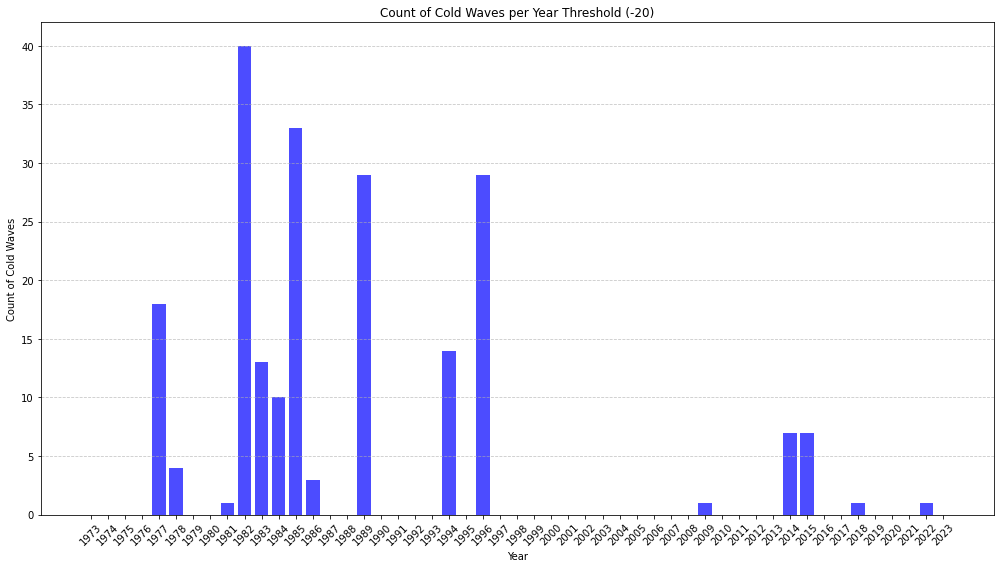

In [12]:

# Set the threshold for a cold wave
cold_wave_threshold = -20

# Create a boolean mask for temperatures below the threshold
below_threshold = data['TMIN'] < cold_wave_threshold

# Find consecutive days with temperatures below the threshold
consecutive_days = below_threshold.astype(int).groupby((below_threshold != below_threshold.shift()).cumsum()).cumsum()

# Filter only the consecutive days where temperature is below the threshold for 2 or more days
cold_wave_mask = consecutive_days >= 2

# Group the data by year and count the number of cold wave periods for each year
cold_wave_counts = cold_wave_mask.groupby(data['year']).sum()

# Generate a range of years starting from 1970
years_range = range(1973, max(cold_wave_counts.index) + 1)

# Create a more spacious bar plot for the count of cold waves per year with explicit x-axis labels
plt.figure(figsize=(14, 8))  # Adjust the figure size for more space
plt.bar(cold_wave_counts.index, cold_wave_counts, color='blue', alpha=0.7)
plt.title("Count of Cold Waves per Year Threshold (-20)")
plt.xlabel("Year")
plt.ylabel("Count of Cold Waves")
plt.xticks(years_range, rotation=45)  # Set explicit x-axis labels
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Add spacing between the plot and the edge of the figure
plt.show()


In [13]:
#  if the temperature remains cold for 4 consecutive days, it will count it as a single cold wave. 
#  The code is designed to find consecutive days where the temperature is below the specified threshold and counts them as a continuous cold period.
#  If there is a break where the temperature rises above the threshold, 
#  it will start a new count when the temperature falls below the threshold again.
#  This means that a continuous period of cold weather, such as 4 days, would be counted as a single cold wave.


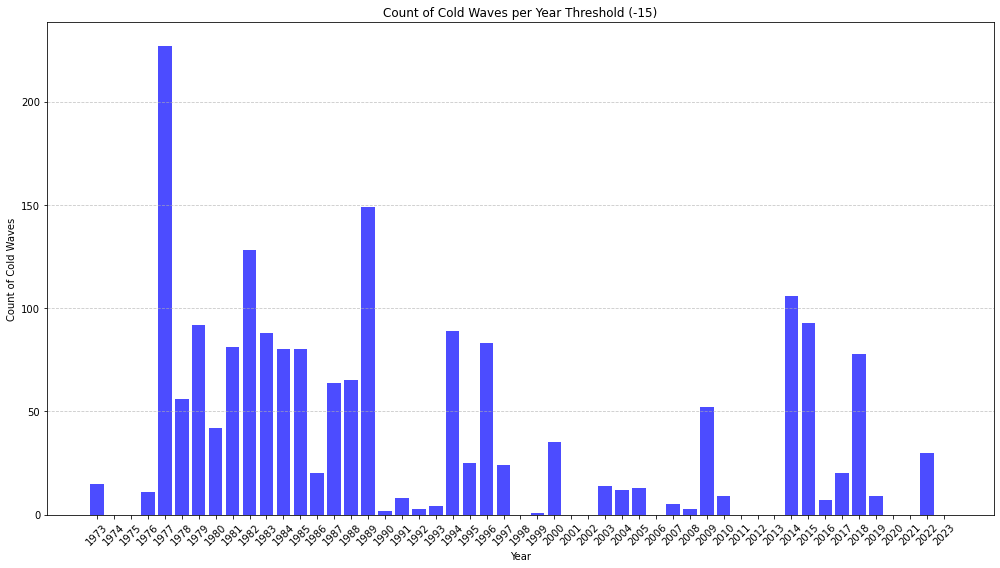

In [14]:

# Set the threshold for a cold wave
cold_wave_threshold = -15

# Create a boolean mask for temperatures below the threshold
below_threshold = data['TMIN'] < cold_wave_threshold

# Find consecutive days with temperatures below the threshold
consecutive_days = below_threshold.astype(int).groupby((below_threshold != below_threshold.shift()).cumsum()).cumsum()

# Filter only the consecutive days where temperature is below the threshold for 2 or more days
cold_wave_mask = consecutive_days >= 2

# Group the data by year and count the number of cold wave periods for each year
cold_wave_counts = cold_wave_mask.groupby(data['year']).sum()

# Generate a range of years starting from 1970
years_range = range(1973, max(cold_wave_counts.index) + 1)

# Create a more spacious bar plot for the count of cold waves per year with explicit x-axis labels
plt.figure(figsize=(14, 8))  # Adjust the figure size for more space
plt.bar(cold_wave_counts.index, cold_wave_counts, color='blue', alpha=0.7)
plt.title("Count of Cold Waves per Year Threshold (-15)")
plt.xlabel("Year")
plt.ylabel("Count of Cold Waves")
plt.xticks(years_range, rotation=45)  # Set explicit x-axis labels
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Add spacing between the plot and the edge of the figure
plt.show()


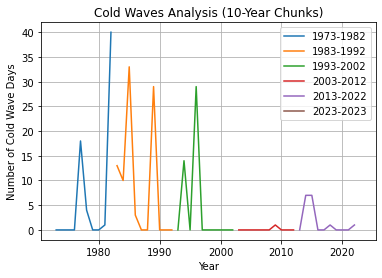

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the data into a DataFrame
data = pd.read_csv("C:/Users/namra/Downloads/VAdata.csv")

# Data Preprocessing: Handle missing values and convert data types

# Replace -999 and 0 with NaN in the entire DataFrame
data = data.replace([-999, 0], np.nan)

# Convert 'TMIN' to a numeric data type, handling non-numeric values
data['TMIN'] = pd.to_numeric(data['TMIN'], errors='coerce')

# Define the cold wave threshold (e.g., -15°C)
cold_wave_threshold = -20

# Create a boolean mask for temperatures below the threshold
below_threshold = data['TMIN'] < cold_wave_threshold

# Find consecutive days with temperatures below the threshold
consecutive_days = below_threshold.astype(int).groupby((below_threshold != below_threshold.shift()).cumsum()).cumsum()

# Filter only the consecutive days where temperature is below the threshold for 2 or more days
cold_wave_mask = consecutive_days >= 2

# Extract the years from the date
data['year'] = pd.to_datetime(data['year'], format='%Y')

# Group the data by year and count the number of cold wave days for each year
cold_wave_counts = cold_wave_mask.groupby(data['year'].dt.year).sum()

# Create 10-year chunks for analysis
chunk_size = 10
years = cold_wave_counts.index
cold_wave_counts_chunked = []

for i in range(0, len(years), chunk_size):
    chunk = cold_wave_counts[i:i + chunk_size]
    chunk_start_year = years[i]
    chunk_end_year = years[min(i + chunk_size - 1, len(years) - 1)]
    label = f"{chunk_start_year}-{chunk_end_year}"
    
    plt.plot(chunk.index.to_numpy(), chunk.to_numpy(), label=label)

plt.title("Cold Waves Analysis (10-Year Chunks)")
plt.xlabel("Year")
plt.ylabel("Number of Cold Wave Days")
plt.legend()
plt.grid(True)
plt.show()


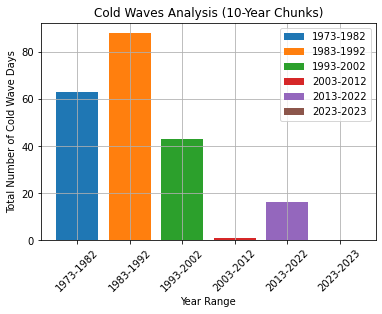

In [16]:

# Define the cold wave threshold (e.g., -15°C)
cold_wave_threshold = -20

# Create a boolean mask for temperatures below the threshold
below_threshold = data['TMIN'] < cold_wave_threshold

# Find consecutive days with temperatures below the threshold
consecutive_days = below_threshold.astype(int).groupby((below_threshold != below_threshold.shift()).cumsum()).cumsum()

# Filter only the consecutive days where temperature is below the threshold for 2 or more days
cold_wave_mask = consecutive_days >= 2

# Extract the years from the date
data['year'] = pd.to_datetime(data['year'], format='%Y')

# Group the data by year and count the number of cold wave days for each year
cold_wave_counts = cold_wave_mask.groupby(data['year'].dt.year).sum()

# Create 10-year chunks for analysis
chunk_size = 10
years = cold_wave_counts.index
cold_wave_counts_chunked = []

for i in range(0, len(years), chunk_size):
    chunk = cold_wave_counts[i:i + chunk_size]
    chunk_start_year = years[i]
    chunk_end_year = years[min(i + chunk_size - 1, len(years) - 1)]
    label = f"{chunk_start_year}-{chunk_end_year}"
    
    plt.bar(label, chunk.sum(), label=label)

plt.title("Cold Waves Analysis (10-Year Chunks)")
plt.xlabel("Year Range")
plt.ylabel("Total Number of Cold Wave Days")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


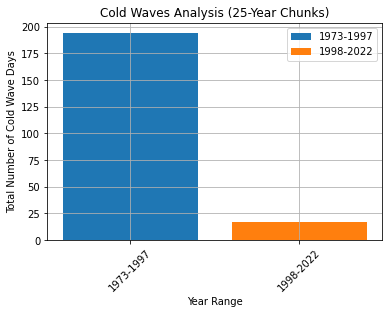

In [17]:

# Define the cold wave threshold (e.g., -15°C)
cold_wave_threshold = -20

# Create a boolean mask for temperatures below the threshold
below_threshold = data['TMIN'] < cold_wave_threshold

# Find consecutive days with temperatures below the threshold
consecutive_days = below_threshold.astype(int).groupby((below_threshold != below_threshold.shift()).cumsum()).cumsum()

# Filter only the consecutive days where temperature is below the threshold for 2 or more days
cold_wave_mask = consecutive_days >= 2

# Extract the years from the date
data['year'] = pd.to_datetime(data['year'], format='%Y')

# Group the data by year and count the number of cold wave days for each year
cold_wave_counts = cold_wave_mask.groupby(data['year'].dt.year).sum()

# Create 25-year chunks for analysis up to 2022
chunk_size = 25
years = cold_wave_counts.index
years = years[years <= 2022]
cold_wave_counts = cold_wave_counts[cold_wave_counts.index <= 2022]

cold_wave_counts_chunked = []

for i in range(0, len(years), chunk_size):
    chunk = cold_wave_counts[i:i + chunk_size]
    chunk_start_year = years[i]
    chunk_end_year = years[min(i + chunk_size - 1, len(years) - 1)]
    label = f"{chunk_start_year}-{chunk_end_year}"
    
    plt.bar(label, chunk.sum(), label=label)

plt.title("Cold Waves Analysis (25-Year Chunks)")
plt.xlabel("Year Range")
plt.ylabel("Total Number of Cold Wave Days")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#Calculating cold wave counts

In [4]:
import pandas as pd
import numpy as np

# Read your dataset into a DataFrame
data = pd.read_csv("C:/Users/namra/Downloads/cleaned_data.csv")  # Replace "your_dataset.csv" with the actual file path

# Data Preprocessing: Handle missing values and convert data types
data = data.replace([-999, 0], np.nan)
data['TMIN'] = pd.to_numeric(data['TMIN'], errors='coerce')

# Define the cold wave threshold
cold_wave_threshold = -10

# Create a boolean mask for temperatures below the threshold
below_threshold = data['TMIN'] < cold_wave_threshold

# Find consecutive days with temperatures below the threshold
consecutive_days = below_threshold.astype(int).groupby((below_threshold != below_threshold.shift()).cumsum()).cumsum()

# Filter only the consecutive days where temperature is below the threshold for 2 or more days
cold_wave_mask = consecutive_days >= 2

# Extract the years from the date
data['year'] = pd.to_datetime(data['date']).dt.year

# Create a pivot table to count cold waves by year and county
cold_wave_counts = data[cold_wave_mask].pivot_table(index=['year', 'county'], values='TMIN', aggfunc='count')

# Reset the index and fill NaN values with 0
cold_wave_counts = cold_wave_counts.reset_index().fillna(0)

# Display the table
print(cold_wave_counts)


      year             county  TMIN
0     1951    Accomack County     2
1     1951   Albemarle County     8
2     1951    Alexandria city     4
3     1951   Alleghany County     9
4     1951      Amelia County     6
...    ...                ...   ...
7924  2023       Giles County     1
7925  2023  Harrisonburg city     1
7926  2023    Highland County     1
7927  2023      Staunton city     1
7928  2023    Winchester city     1

[7929 rows x 3 columns]


In [ ]:
#saving coldwave counts to a csv file

In [4]:

output_path = "C:/Users/namra/Downloads/cold_wave_counts.csv"

# Save the DataFrame to a CSV file
cold_wave_counts.to_csv(output_path, index=False)

# Confirm that the file has been saved
print(f"Data saved to {output_path}")


Data saved to C:/Users/namra/Downloads/cold_wave_counts.csv


In [ ]:
#Calculating heat wave counts

In [5]:
import pandas as pd
import numpy as np

# Read your dataset into a DataFrame
data = pd.read_csv("C:/Users/namra/Downloads/cleaned_data.csv")  # Replace "your_dataset.csv" with the actual file path

# Data Preprocessing: Handle missing values and convert data types
data = data.replace([-999, 0], np.nan)
data['TMAX'] = pd.to_numeric(data['TMAX'], errors='coerce')

# Define the cold wave threshold
heat_wave_threshold = 33

# Create a boolean mask for temperatures below the threshold
below_threshold = data['TMAX'] >= heat_wave_threshold

# Find consecutive days with temperatures below the threshold
consecutive_days = below_threshold.astype(int).groupby((below_threshold != below_threshold.shift()).cumsum()).cumsum()

# Filter only the consecutive days where temperature is below the threshold for 2 or more days
heat_wave_mask = consecutive_days >= 2

# Extract the years from the date
data['year'] = pd.to_datetime(data['date']).dt.year

# Create a pivot table to count heat waves by year and county
heat_wave_counts = data[heat_wave_mask].pivot_table(index=['year', 'county'], values='TMAX', aggfunc='count')

# Reset the index and fill NaN values with 0
heat_wave_counts = heat_wave_counts.reset_index().fillna(0)

# Display the table
print(heat_wave_counts)


      year               county  TMAX
0     1951     Albemarle County     6
1     1951      Alexandria city     4
2     1951     Alleghany County     1
3     1951        Amelia County    12
4     1951       Amherst County     2
...    ...                  ...   ...
7675  2023      Waynesboro city     2
7676  2023  Westmoreland County     9
7677  2023    Williamsburg city     6
7678  2023      Winchester city     8
7679  2023          York County    10

[7680 rows x 3 columns]


In [ ]:
#Saving heat wave counts to a csv file

In [2]:
output_path = "C:/Users/namra/Downloads/heat_wave_counts.csv"

# Save the DataFrame to a CSV file
heat_wave_counts.to_csv(output_path, index=False)

# Confirm that the file has been saved
print(f"Data saved to {output_path}")

Data saved to C:/Users/namra/Downloads/heat_wave_counts.csv


In [ ]:
#Aggregating cold wave and heat wave counts along with years and county columns into one csv file

In [6]:
# Assuming you have already calculated heat_wave_counts and cold_wave_counts DataFrames

# Merge the DataFrames on 'year' and 'county' columns
combined_wave_counts = pd.merge(heat_wave_counts, cold_wave_counts, on=['year', 'county'], how='outer')

# Fill NaN values with 0
combined_wave_counts = combined_wave_counts.fillna(0)

# Save the combined data to a CSV file
combined_wave_counts.to_csv("C:/Users/namra/Downloads/combined_wave_counts.csv", index=False)


In [ ]:
#Calculating heat wave counts in every 10 years

In [ ]:
import pandas as pd

# Read the data into a DataFrame
data = pd.read_csv(".csv")

# Set the 'year' column to datetime
data['year'] = pd.to_datetime(data['year'], format='%Y')

# Create 10-year intervals and group the data
data['10_year_intervals'] = pd.cut(data['year'].dt.year, bins=range(1950, 2030, 10))
heat_wave_counts_10_years = data.groupby('10_year_intervals')['heat_wave_counts'].sum().reset_index()

# Display the table
print(heat_wave_counts_10_years)


In [7]:
combined_wave_counts

,year,county,TMAX,TMIN
0,1951,Albemarle County,6.0,8.0
1,1951,Alexandria city,4.0,4.0
2,1951,Alleghany County,1.0,9.0
3,1951,Amelia County,12.0,6.0
4,1951,Amherst County,2.0,5.0
...,...,...,...,...
9515,2022,Wise County,0.0,5.0
9516,2022,Wythe County,0.0,5.0
9517,2023,Bland County,0.0,1.0
9518,2023,Giles County,0.0,1.0


In [10]:
# Read your dataset into a DataFrame
data = combined_wave_counts

# Data Preprocessing: Handle missing values and convert data types
data = data.replace([-999, 0], np.nan)
data['TMAX'] = pd.to_numeric(data['TMAX'], errors='coerce')
data['TMIN'] = pd.to_numeric(data['TMIN'], errors='coerce')

# Define the 10-year intervals
data['10_year_interval'] = ((data['year'] // 10) * 10).astype(str) + '-' + ((data['year'] // 10) * 10 + 9).astype(str)

# Group and aggregate the data by 10-year intervals
result = data.groupby(['10_year_interval', 'county'])[['TMAX', 'TMIN']].sum()

# Reset the index
result.reset_index(inplace=True)

# Save the result to a CSV file
result.to_csv("C:/Users/namra/Downloads/10_year_trends.csv", index=False)


In [9]:
result

,10_year_interval,TMAX,TMIN
0,1950-1959,11753.0,5701.0
1,1960-1969,5986.0,10861.0
2,1970-1979,5288.0,10504.0
3,1980-1989,12245.0,10171.0
4,1990-1999,10998.0,4082.0
5,2000-2009,8586.0,4169.0
6,2010-2019,11689.0,5776.0
7,2020-2029,3383.0,608.0


In [ ]:
#Calculating heat wave counts in every 10 yaers along with county

In [21]:
# Data Preprocessing: Handle missing values and convert data types
data = data.replace([-999, 0], np.nan)
data['TMAX'] = pd.to_numeric(data['TMAX'], errors='coerce')
data['TMIN'] = pd.to_numeric(data['TMIN'], errors='coerce')

# Define the 10-year intervals
data['10_year_interval'] = ((data['year'] // 10) * 10).astype(str) + '-' + ((data['year'] // 10) * 10 + 9).astype(str)

# Group and aggregate the data by 10-year intervals and county
result = data.groupby(['10_year_interval', 'county'])[['TMAX', 'TMIN']].sum()

# Reset the index
result.reset_index(inplace=True)

# Save the result to a CSV file
result.to_csv("C:/Users/namra/Downloads/10_year_trends_by_county.csv", index=False)

In [20]:
result

,10_year_interval,county,TMAX,TMIN
0,1950-1959,Accomack County,54.0,12.0
1,1950-1959,Albemarle County,88.0,55.0
2,1950-1959,Alexandria city,96.0,37.0
3,1950-1959,Alleghany County,33.0,62.0
4,1950-1959,Amelia County,138.0,43.0
...,...,...,...,...
1051,2020-2029,Williamsburg city,28.0,3.0
1052,2020-2029,Winchester city,28.0,7.0
1053,2020-2029,Wise County,0.0,6.0
1054,2020-2029,Wythe County,0.0,5.0


In [ ]:
#Calculating heat wave counts in every 25 yaers along with county column

In [22]:
data = data.replace([-999, 0], np.nan)
data['TMAX'] = pd.to_numeric(data['TMAX'], errors='coerce')
data['TMIN'] = pd.to_numeric(data['TMIN'], errors='coerce')

# Define the 25-year intervals
data['25_year_interval'] = ((data['year'] // 25) * 25).astype(str) + '-' + ((data['year'] // 25) * 25 + 24).astype(str)

# Group and aggregate the data by 25-year intervals and county
result = data.groupby(['25_year_interval', 'county'])[['TMAX', 'TMIN']].sum()

# Reset the index
result.reset_index(inplace=True)

# Save the result to a CSV file
result.to_csv("C:/Users/namra/Downloads/25_year_trends_by_county.csv", index=False)

In [23]:
result

,25_year_interval,county,TMAX,TMIN
0,1950-1974,Accomack County,86.0,57.0
1,1950-1974,Albemarle County,153.0,207.0
2,1950-1974,Alexandria city,167.0,135.0
3,1950-1974,Alleghany County,42.0,234.0
4,1950-1974,Amelia County,246.0,150.0
...,...,...,...,...
391,2000-2024,Williamsburg city,274.0,35.0
392,2000-2024,Winchester city,166.0,110.0
393,2000-2024,Wise County,4.0,112.0
394,2000-2024,Wythe County,15.0,116.0
